In [2]:
import tensorflow as tf
import logging
# disable tf warnings
tf.get_logger().setLevel(logging.ERROR)
from tensorflow.python.keras import Sequential
# For layers
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import InputLayer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
class Phishing_Detection_Model:
    def __init__(self,num_features,load_weights=False,weights_path="phishing-detection-model.hf",train=True):
        self.load_weights = load_weights
        self.weights_path = weights_path
        self.learning_rate = 2e-4
        self.train_ = train
        self.num_features = num_features
        self.model = self.build_model()
    def build_model(self):
        model=Sequential(name="Phishing_Detection_Model")
        model.add(InputLayer(input_shape=(self.num_features), name='Input_Layer')) 
        model.add(Dense(100,activation='relu', name='Hidden_Layer1'))
        model.add(Dense(200,activation='relu', name='Hidden_Layer2'))
        model.add(Dense(100,activation='relu', name='Hidden_Layer3'))
        model.add(Dense(50, activation='relu', name='Hidden_Layer4')) 
        model.add(Dense(1, activation='sigmoid', name='Output_Layer')) 
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        if self.load_weights:
           model.load_weights(self.weights_path)
        return model

    def train(self, train_feature_vecs, train_answers_vec):
        if self.train_:
            history = self.model.fit(
                x=train_feature_vecs,
                y=train_answers_vec,
                validation_split=0.25,
                shuffle=True,
                epochs=50
            )
        self.model.save("phishing-detection-model")
        self.plot_stats(history)
    def predict(self, test_feature_vecs):
        return self.model.predict(test_feature_vecs)
    
    def plot_stats(self, history):
        accuracy = history.history["accuracy"]
        loss = history.history["loss"]
        epochs = range(1, len(accuracy) + 1)

        plt.title('Training accuracy and loss')
        plt.plot(epochs, accuracy, 'b*', label='Training accuracy')
        plt.plot(epochs, loss, 'b-', label='Training loss')
        plt.legend()
        plt.xlabel("Epochs")
        plt.savefig('Training accuracy and loss')

In [4]:
def calculate_accuracy(predictions, targets):
    correct = 0
    total = 0
    for i in range(len(predictions)):
        act_label = targets[i]
        pred_label = 0 if predictions[i] < 0.5 else 1
        if(act_label == pred_label):
            correct += 1
        total += 1
    accuracy = (correct/total)
    return accuracy

In [5]:
def get_features_targets(df, column):
    targets = df[column]
    targets = tf.convert_to_tensor(targets)
    features = df.drop(columns=column)
    features = tf.convert_to_tensor(features)
    return features, targets


In [6]:
def train_val_test_split(df, column):
    # train - 60%
    train = df.sample(frac = 0.8)
    # validation - 20% , test - 20%
    test = df.drop(train.index)
    train_features, train_targets = get_features_targets(train, column)
    test_features, test_targets = get_features_targets(test, column)
    return train_features, train_targets, test_features, test_targets 

In [60]:
data = pd.read_csv('cleaned_phishing_dataset.csv')
df = pd.DataFrame(data)
train_features, train_targets, test_features, test_targets = train_val_test_split(df, 'CLASS_LABEL')
assert train_features.shape[1] == test_features.shape[1] == len(df.columns) - 1

In [53]:
model = Phishing_Detection_Model(num_features=train_features.shape[1])

Epoch 1/50
188/188 [==============================] - 1s 3ms/step - loss: 0.4843 - accuracy: 0.7695 - val_loss: 0.2380 - val_accuracy: 0.9085
Epoch 2/50
188/188 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.9158 - val_loss: 0.1982 - val_accuracy: 0.9280
Epoch 3/50
188/188 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9248 - val_loss: 0.2059 - val_accuracy: 0.9280
Epoch 4/50
188/188 [==============================] - 1s 3ms/step - loss: 0.1667 - accuracy: 0.9393 - val_loss: 0.1862 - val_accuracy: 0.9305
Epoch 5/50
188/188 [==============================] - 0s 3ms/step - loss: 0.1606 - accuracy: 0.9385 - val_loss: 0.1863 - val_accuracy: 0.9335
Epoch 6/50
188/188 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9442 - val_loss: 0.1513 - val_accuracy: 0.9435
Epoch 7/50
188/188 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9467 - val_loss: 0.1537 - val_accuracy: 0.9420
Epoch 

2023-02-05 17:14:34.431190: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


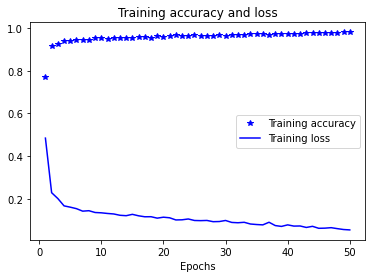

In [54]:
model.train(train_features,train_targets)

In [63]:
predicted_labels = model.predict(test_features)
calculate_accuracy(predictions=predicted_labels, targets=test_targets)

0.972

In [61]:
data2 = pd.read_csv('phishing_dataset_full.csv')
df2 = pd.DataFrame(data2)
train_features2, train_targets2, test_features2, test_targets2 = train_val_test_split(df2,'phishing')

In [ ]:
model2 = Phishing_Detection_Model(num_features=train_features2.shape[1])

Epoch 1/50
1663/1663 [==============================] - 5s 3ms/step - loss: 14.2587 - accuracy: 0.7166 - val_loss: 1.4894 - val_accuracy: 0.7625
Epoch 2/50
1663/1663 [==============================] - 4s 2ms/step - loss: 0.7922 - accuracy: 0.8213 - val_loss: 0.5369 - val_accuracy: 0.8221
Epoch 3/50
1663/1663 [==============================] - 4s 2ms/step - loss: 0.5695 - accuracy: 0.8417 - val_loss: 0.4965 - val_accuracy: 0.6746
Epoch 4/50
1663/1663 [==============================] - 4s 2ms/step - loss: 0.3654 - accuracy: 0.8507 - val_loss: 0.3078 - val_accuracy: 0.8278
Epoch 5/50
1663/1663 [==============================] - 4s 2ms/step - loss: 0.3549 - accuracy: 0.8342 - val_loss: 0.3560 - val_accuracy: 0.8572
Epoch 6/50
1663/1663 [==============================] - 4s 2ms/step - loss: 0.4077 - accuracy: 0.8286 - val_loss: 2.1082 - val_accuracy: 0.4660
Epoch 7/50
1663/1663 [==============================] - 4s 2ms/step - loss: 0.3031 - accuracy: 0.8633 - val_loss: 0.2788 - val_accuracy

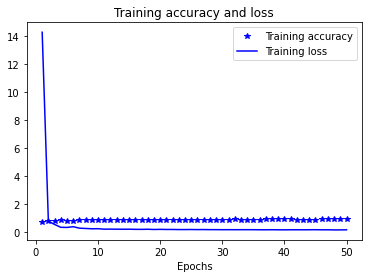

In [ ]:
model2.train(train_features2,train_targets2)

In [ ]:
predicted_labels2 = model2.predict(test_features2)
calculate_accuracy(predictions=predicted_labels2, targets=test_targets2)

0.927519882678098

In [7]:
data3 = pd.read_csv('phishing_dataset.csv')
df3 = pd.DataFrame(data3)
train_features3, train_targets3, test_features3, test_targets3 = train_val_test_split(df3,'ClassLabel')

In [8]:
model3 = Phishing_Detection_Model(num_features=train_features3.shape[1])

2023-02-12 18:41:35.100354: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50
188/188 [==============================] - 1s 3ms/step - loss: 7.6406 - accuracy: 0.8437 - val_loss: 2.0878 - val_accuracy: 0.8455
Epoch 2/50
188/188 [==============================] - 0s 2ms/step - loss: 2.1707 - accuracy: 0.8597 - val_loss: 1.9064 - val_accuracy: 0.8610
Epoch 3/50
188/188 [==============================] - 0s 2ms/step - loss: 0.8899 - accuracy: 0.8590 - val_loss: 0.2187 - val_accuracy: 0.9135
Epoch 4/50
188/188 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8867 - val_loss: 0.3002 - val_accuracy: 0.8665
Epoch 5/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.9025 - val_loss: 0.2001 - val_accuracy: 0.9030
Epoch 6/50
188/188 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.9208 - val_loss: 0.2300 - val_accuracy: 0.9290
Epoch 7/50
188/188 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.9190 - val_loss: 0.1751 - val_accuracy: 0.9430
Epoch 

2023-02-12 18:41:52.937844: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


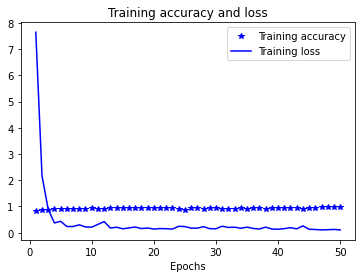

In [9]:
model3.train(train_features3,train_targets3)

In [11]:
predicted_labels3 = model3.predict(test_features3)
calculate_accuracy(predictions=predicted_labels3, targets=test_targets3)

0.9725